In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('USA_Covid.csv')
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [4]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

Theree is multiple column with null value so we replace mean for numerical column and mode for categorical data 

In [5]:
imp=SimpleImputer(strategy='mean')
lst=['Lat','Long_','Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']
for i in lst:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    



In [6]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

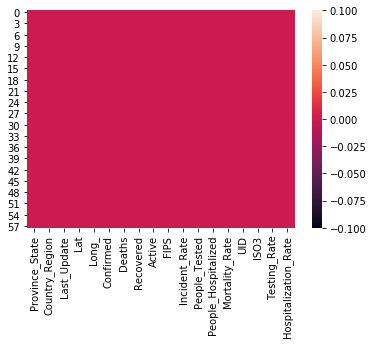

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,ASM,222.857246,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584


In [9]:
df.shape

(58, 18)

In [10]:
df.Country_Region.value_counts()

US    58
Name: Country_Region, dtype: int64

In [11]:
df.ISO3.value_counts()

USA    53
GUM     1
MNP     1
PRI     1
VIR     1
ASM     1
Name: ISO3, dtype: int64

In [12]:
# Conversion last update column from object to  datetime
df['Last_Update']=pd.DatetimeIndex(df['Last_Update'])

In [13]:
df.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   58 non-null     float64       
 4   Long_                 58 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             58 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         58 non-null     float64       
 11  People_Tested         58 non-null     float64       
 12  People_Hospitalized   58 non-null     float64       
 13  Mortality_Rate        

Province_State,Country_Region,ISO3 are Object date type and remaining float datatype      

In [15]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [16]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,1898.951207,3.781861
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963
50%,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,3501.526835,14.342541
75%,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


if mean is greater than median then that attibute is right skewed such columns are Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate

If Difference between 75% and max is high in Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate means outlier are present.

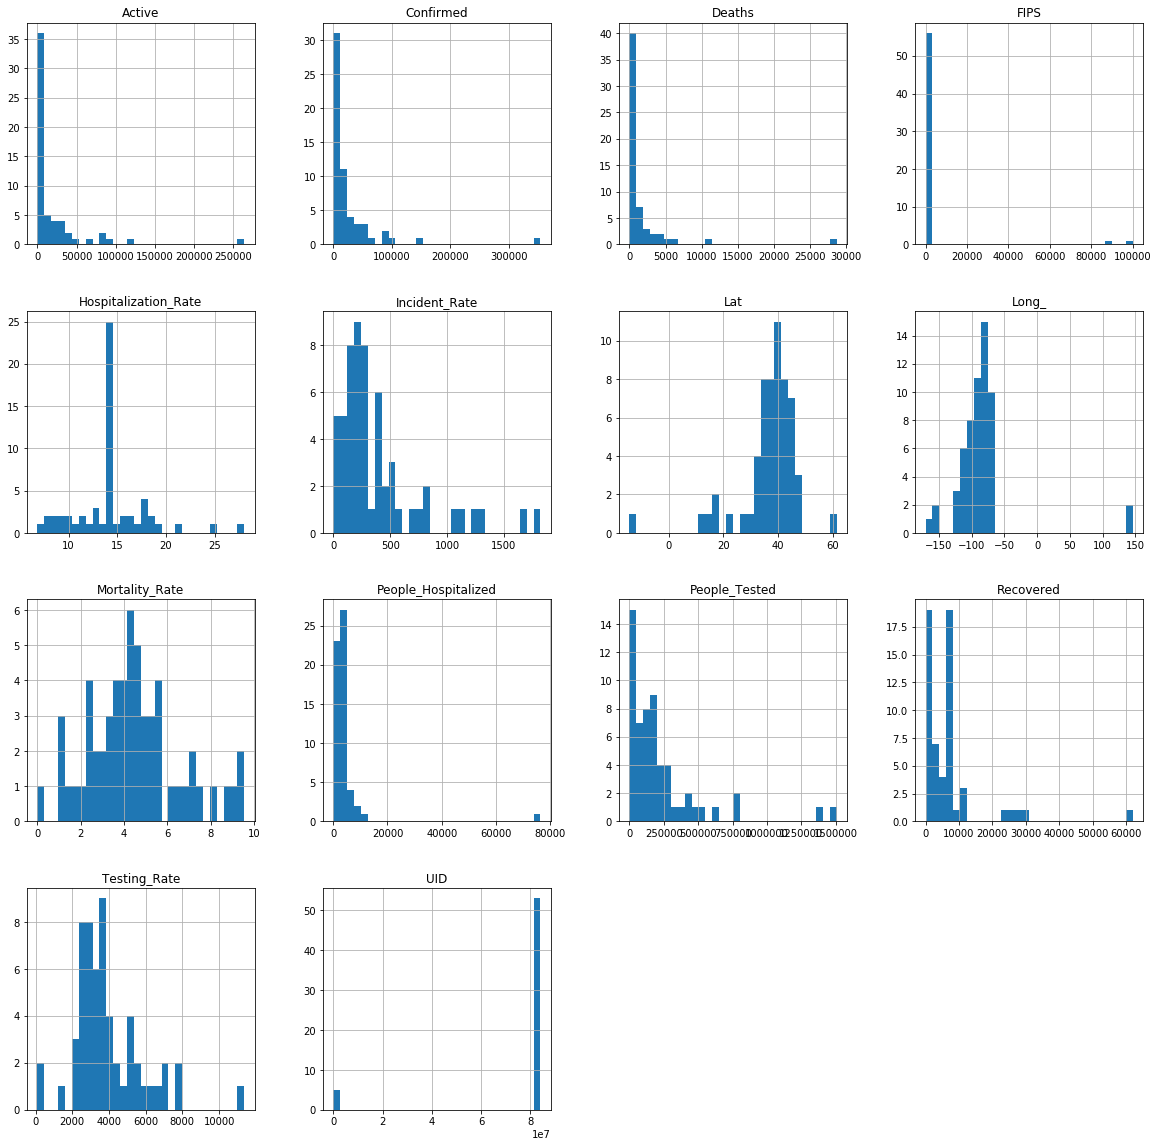

In [17]:
df.hist(bins = 30, figsize=(20,20));

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 <a list of 56 Text xticklabel objects>)

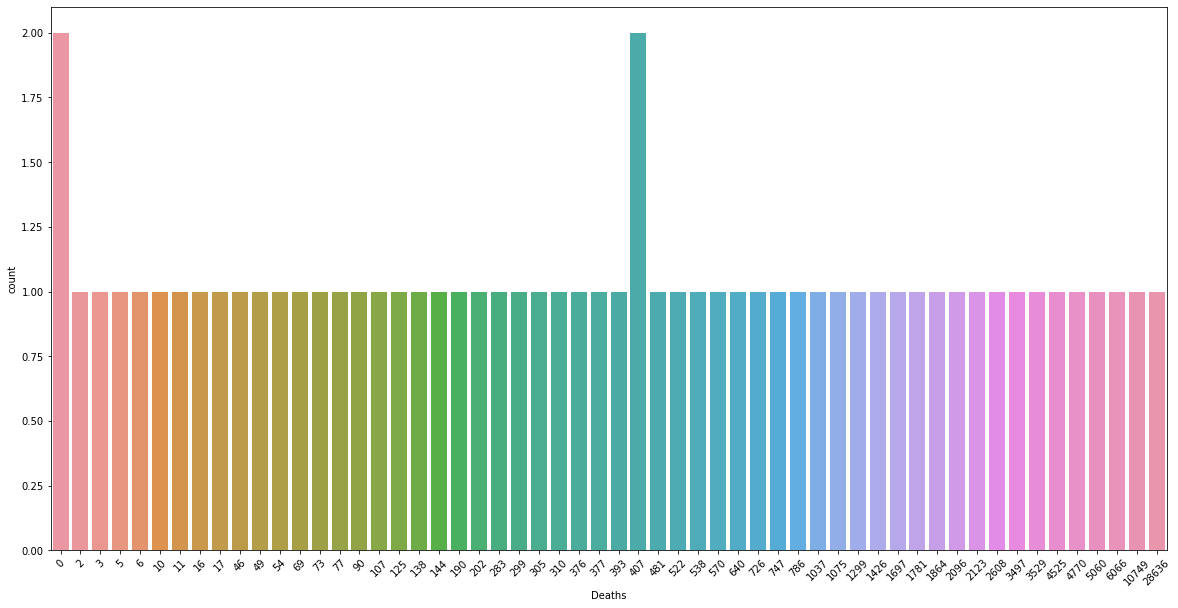

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(df['Deaths'])
plt.xticks(rotation=45)

Maximum Deaths are 28636   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

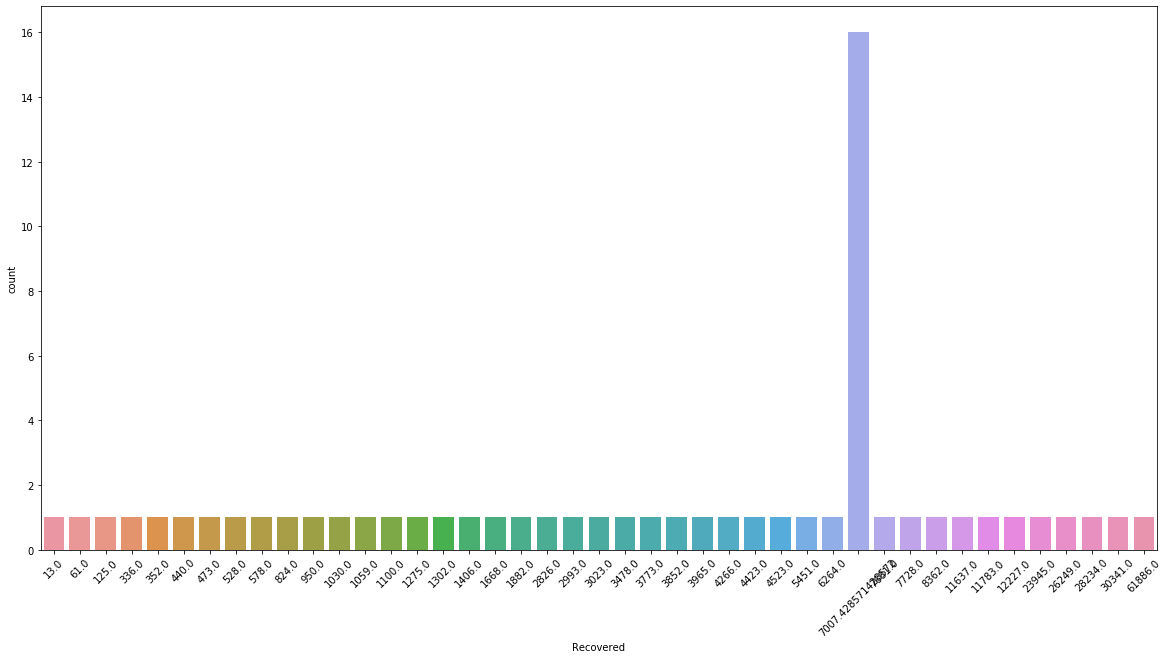

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(df['Recovered'])
plt.xticks(rotation=45)

Maximum 61886 is recovery rate for a day

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text xticklabel objects>)

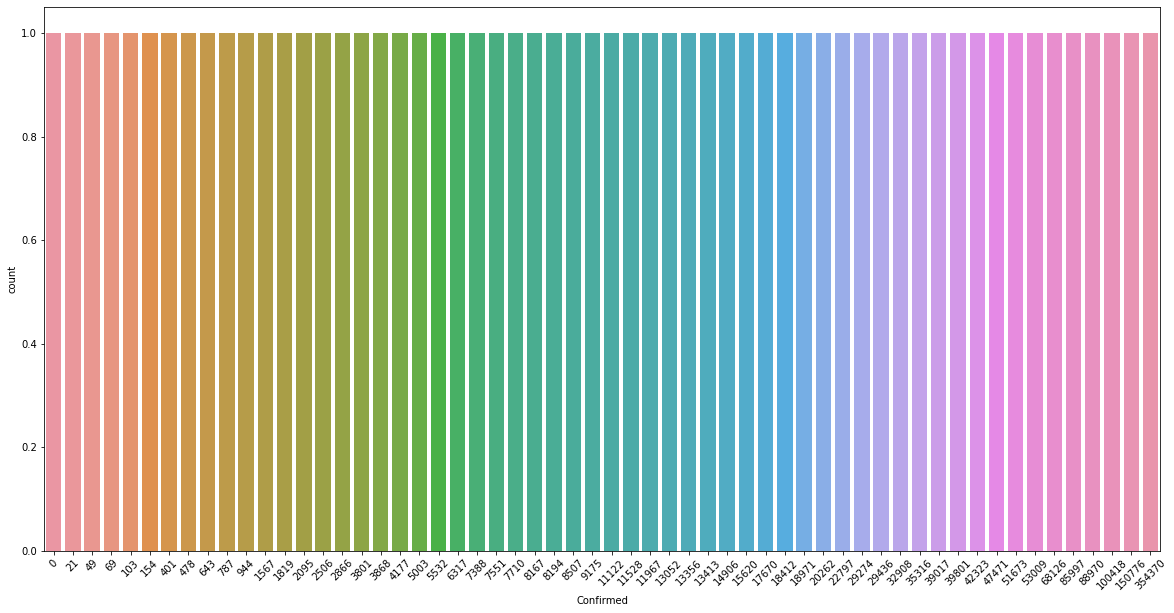

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(df['Confirmed'])
plt.xticks(rotation=45)

Total 354370 confirmed cases

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text xticklabel objects>)

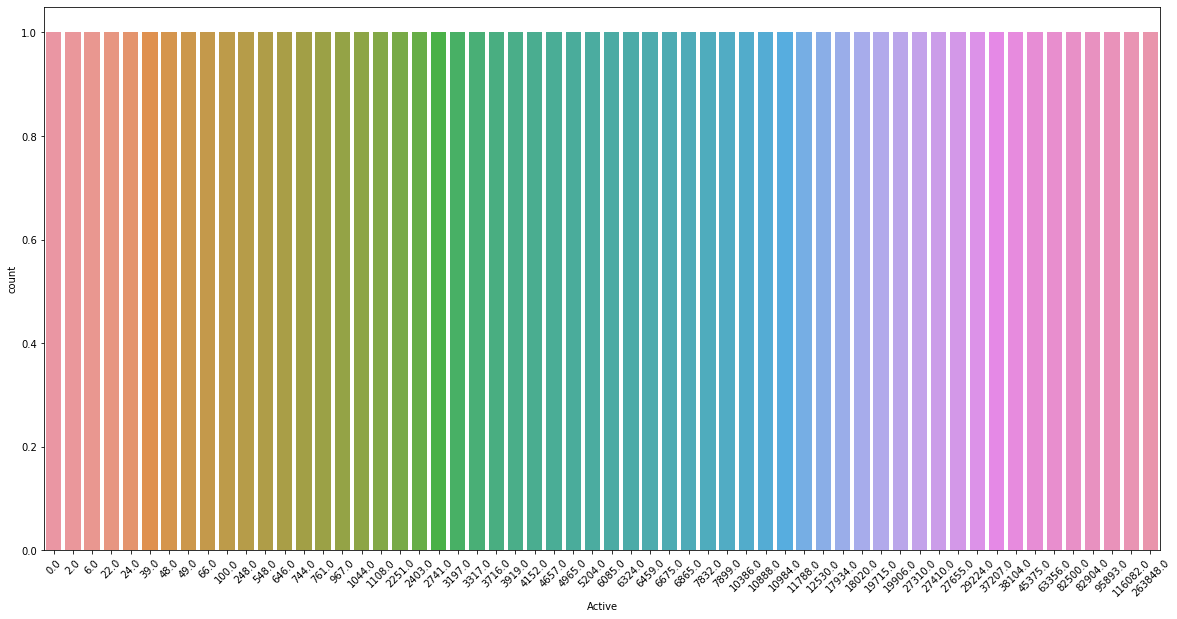

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(df['Active'])
plt.xticks(rotation=45)

Total 263848 active cases

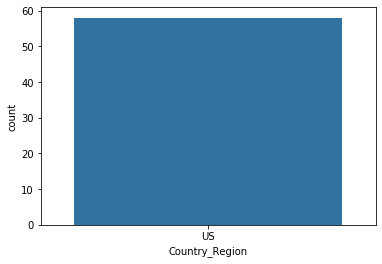

In [22]:
sns.countplot(df['Country_Region'])

Only 1 region is present

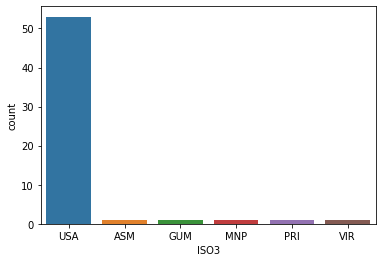

In [23]:
sns.countplot(df['ISO3'])

Officialy assigned country code identifiers is more in USA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text xticklabel objects>)

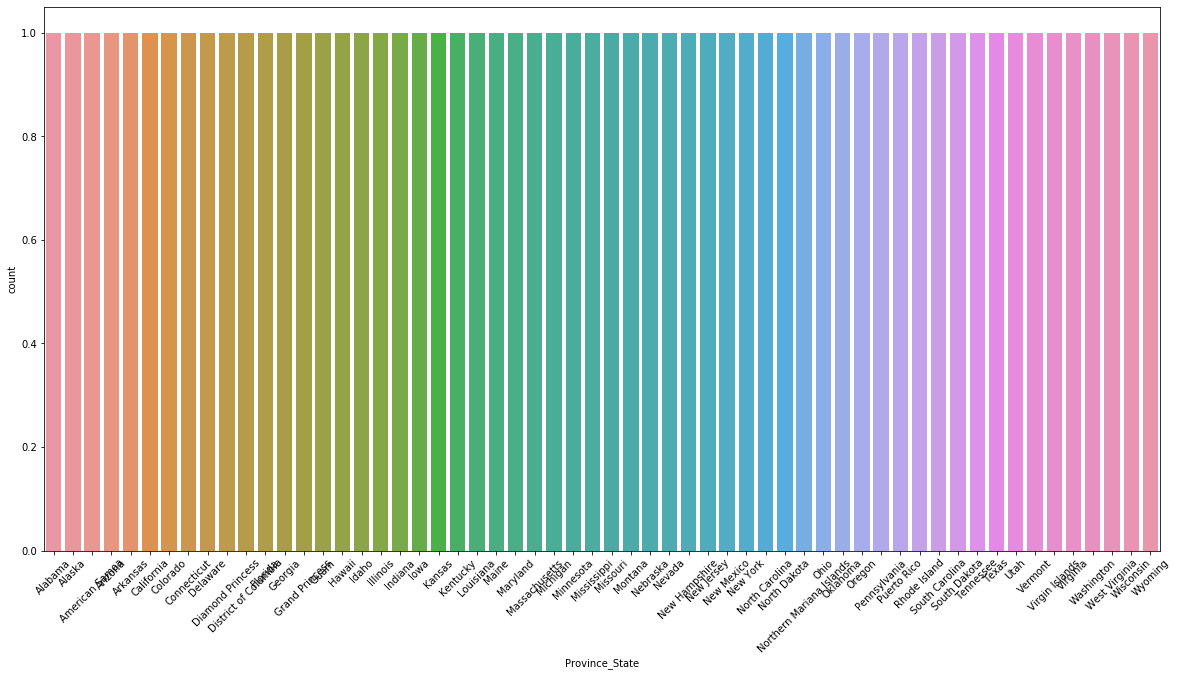

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(df['Province_State'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 <a list of 57 Text xticklabel objects>)

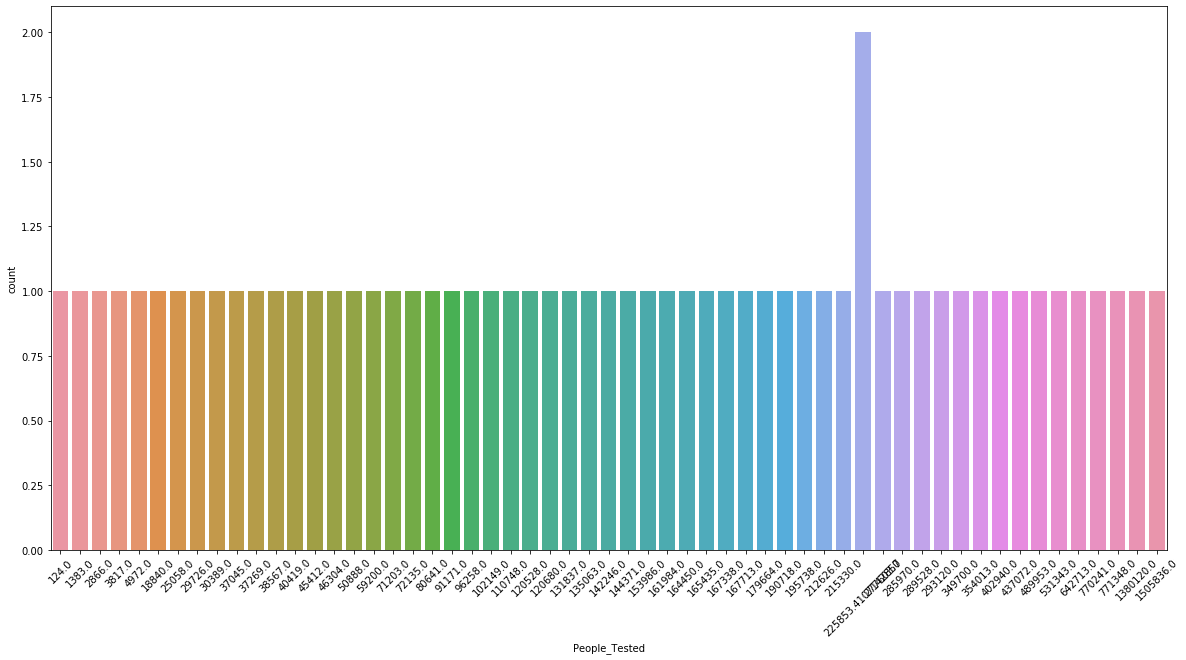

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(df['People_Tested'])
plt.xticks(rotation=45)

Total 1505836 people tested

In [26]:
#Conversion categorical data to numerical data
le=LabelEncoder()
lst=['Province_State','ISO3','Country_Region']
for i in lst:
    df[i]=le.fit_transform(df[i])

In [27]:
df.dtypes

Province_State                   int32
Country_Region                   int32
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                             int32
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [28]:
#Checking correlation matrix
cor=df.corr()

In [29]:
cor

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,NaN,0.153948,0.089445,0.006490,0.015229,0.067595,-0.027612,-0.195045,-0.078280,-0.065428,5.461319e-03,0.019090,-3.133086e-02,1.967772e-01,0.083183,-1.316941e-01
Country_Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,0.153948,NaN,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,2.645628e-02,-0.134906,7.727677e-01,7.244034e-01,0.309579,-6.625465e-02
Long_,0.089445,NaN,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,7.967739e-02,0.297192,-5.259975e-01,-4.036427e-01,0.190191,7.138145e-02
Confirmed,0.006490,NaN,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,8.692673e-01,0.382537,1.539717e-01,1.099993e-01,0.332464,2.874708e-01
Deaths,0.015229,NaN,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,9.082786e-01,0.427127,1.200429e-01,8.558846e-02,0.344465,2.982254e-01
Recovered,0.067595,NaN,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,7.618294e-01,0.322160,1.303142e-01,6.807968e-02,0.220597,2.316917e-01
Active,-0.027612,NaN,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,8.359377e-01,0.367626,1.463538e-01,1.048243e-01,0.321395,2.845637e-01
FIPS,-0.195045,NaN,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,9.150251e-06,-0.262178,5.802216e-02,4.058567e-02,-0.000100,-1.176128e-04
Incident_Rate,-0.078280,NaN,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,5.510764e-01,0.353882,2.643102e-01,1.954154e-01,0.620621,1.960289e-01


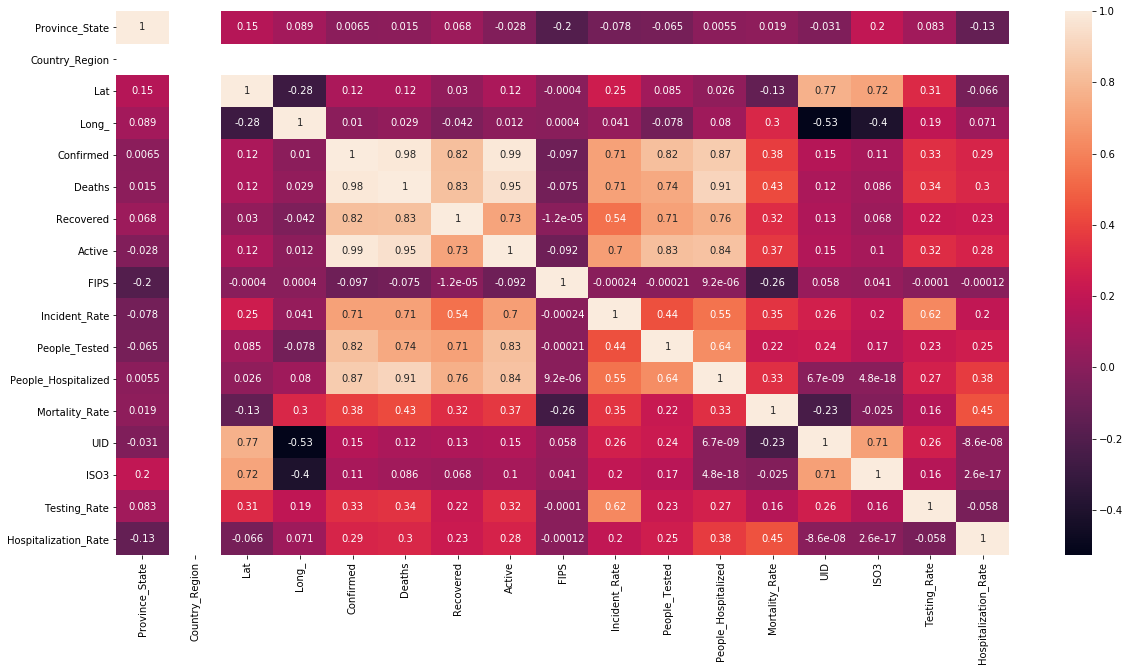

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

Recorved,Active,Incident rate,People_tested,pepole_hospitalized,confirmed are  highly correlated with target column death

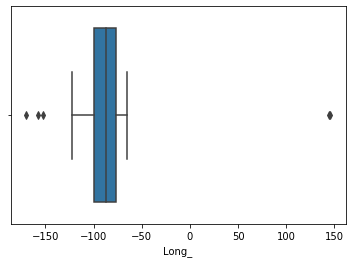

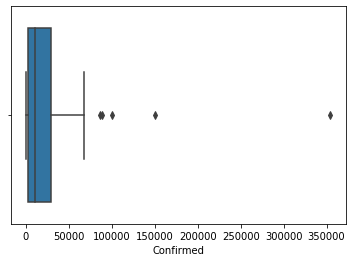

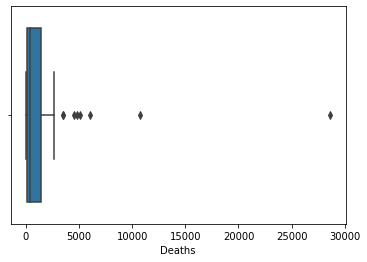

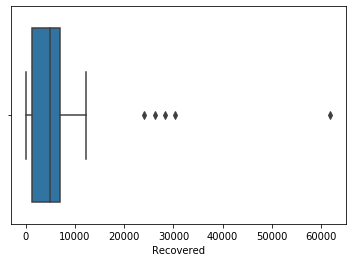

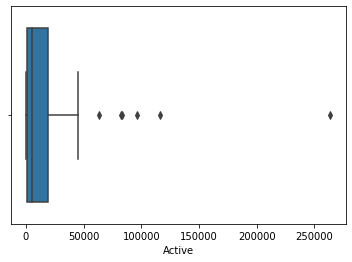

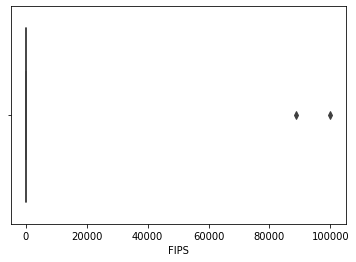

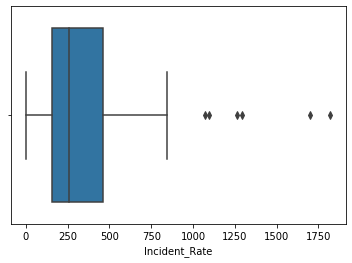

In [31]:
#Checking the Outliers
lst=['Long_','Confirmed','Deaths','Recovered','Active','FIPS','Incident_Rate']
for i in lst:
    plt.figure(i)
    sns.boxplot(df[i])

In [32]:
#Seperating date month year
df['Date']=df['Last_Update'].dt.day
df['Month']=df['Last_Update'].dt.month

In [33]:
df.drop('Last_Update',axis=1,inplace=True)

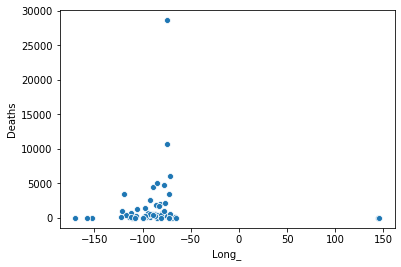

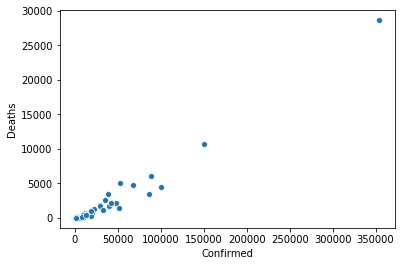

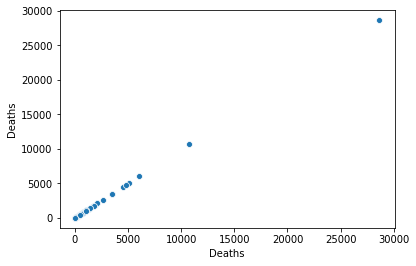

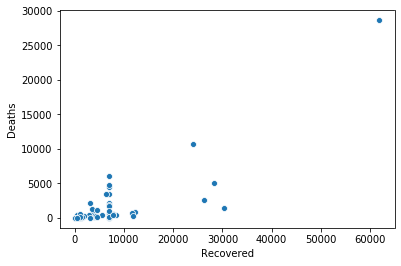

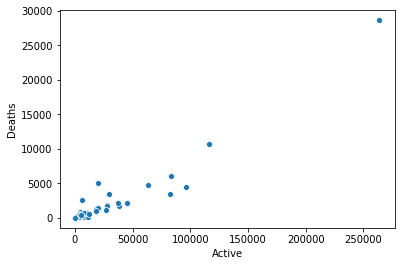

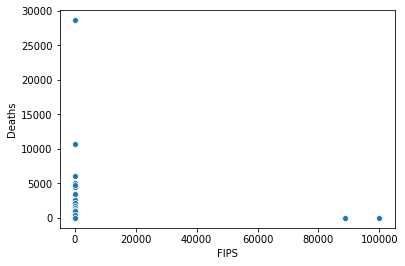

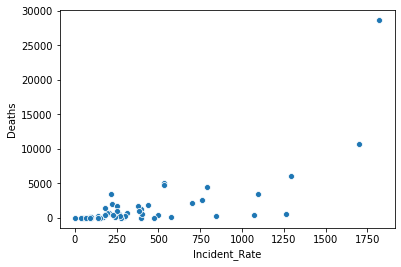

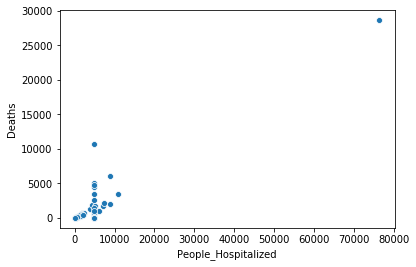

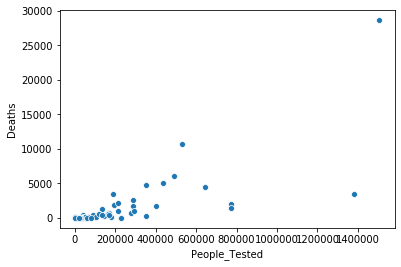

In [34]:
lst=['Long_','Confirmed','Deaths','Recovered','Active','FIPS','Incident_Rate','People_Hospitalized','People_Tested']
for i in lst:
    plt.figure(i)
    sns.scatterplot(x=df[i],y=df['Deaths'])

most of column having linear relation with target column deaths 

In [35]:
#Checking the Skewness
df.skew()

Province_State          0.000000
Country_Region          0.000000
Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
Date                    0.000000
Month                   0.000000
dtype: float64

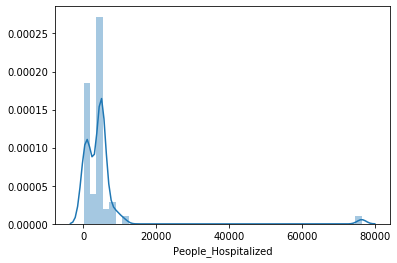

In [36]:
sns.distplot(df['People_Hospitalized'])

In [37]:
lst=['FIPS','People_Hospitalized']
for i in lst:
    df[i]=np.log(df[i])

In [38]:
lst=['Confirmed','Recovered','Active']
for i in lst:
    df[i]=np.sqrt(df[i])

In [39]:
df.skew()

Province_State          0.000000
Country_Region          0.000000
Lat                    -2.250097
Long_                   3.567919
Confirmed               1.901107
Deaths                  5.489201
Recovered               1.431056
Active                  1.818910
FIPS                    3.098035
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized    -0.933478
Mortality_Rate          0.496115
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
Date                    0.000000
Month                   0.000000
dtype: float64

In [40]:
#Removing the outliers
z=np.abs(zscore(df))

In [41]:
z

array([[1.70244092e+00,            nan, 4.26523477e-01, ...,
        7.74497410e-01,            nan,            nan],
       [1.64270615e+00,            nan, 2.31382962e+00, ...,
        4.73806709e-16,            nan,            nan],
       [1.58297138e+00,            nan, 4.82101134e+00, ...,
        4.73806709e-16,            nan,            nan],
       ...,
       [1.58297138e+00,            nan, 1.55739656e-01, ...,
        4.73806709e-16,            nan,            nan],
       [1.64270615e+00,            nan, 7.00678714e-01, ...,
        4.71762787e-01,            nan,            nan],
       [1.70244092e+00,            nan, 5.58013399e-01, ...,
        1.31757581e+00,            nan,            nan]])

In [42]:
print(np.where(z>3))

(array([ 2,  2,  2,  5,  7,  9, 13, 14, 14, 14, 34, 36, 36, 36, 36, 36, 36,
       39, 39, 44, 45, 52], dtype=int64), array([ 2, 13, 14, 10, 16,  8,  8,  3, 13, 14,  9,  4,  5,  6,  7,  9, 10,
        3, 13, 13, 15, 13], dtype=int64))


In [43]:
df_new=df[(z<3).all(axis=1)]

In [44]:
df.shape

(58, 19)

In [45]:
x=df.drop('Deaths',axis=1)
y=df['Deaths']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [47]:
print(x_train.shape,'\t',x_test.shape)
print(y_train.shape,'\t',y_test.shape)

(40, 18) 	 (18, 18)
(40,) 	 (18,)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [49]:
model=[LinearRegression(),Lasso(),Ridge(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('\n',m,'Model')
    print('Score',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print("Errors:")
    print("Mean Squered=",mean_squared_error(y_test,pred))
    print("Mean absulate=",mean_absolute_error(y_test,pred))
    print("RMSC=",np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_Score=',r2_score(y_test,pred))


 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Model
Score 0.9115919772512932
Errors:
Mean Squered= 23046593.281428676
Mean absulate= 2017.9576869868579
RMSC= 4800.686751021011
r2_Score= 0.48929555467892605

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) Model
Score 0.9115304619837608
Errors:
Mean Squered= 22881725.43961014
Mean absulate= 1981.9325880020483
RMSC= 4783.484654476289
r2_Score= 0.4929489683821594

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Model
Score 0.9068230193167255
Errors:
Mean Squered= 22166439.222279247
Mean absulate= 1736.4380549258078
RMSC= 4708.124809547772
r2_Score= 0.5087994607480809

 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1

By Observetion Ridge is best model

In [50]:
from sklearn.model_selection import GridSearchCV,cross_val_score
rg=Ridge()
param={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(rg,param)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [51]:
rg=Ridge(alpha=1,random_state=42)
rg.fit(x_train,y_train)
print('Score',rg.score(x_train,y_train))
pred=rg.predict(x_test)
print("Errors:")
print("Mean Squered=",mean_squared_error(y_test,pred))
print("Mean absulate=",mean_absolute_error(y_test,pred))
print("RMSC=",np.sqrt(mean_squared_error(y_test,pred)))
print('r2_Score=',r2_score(y_test,pred))


Score 0.9068230193167255
Errors:
Mean Squered= 22166439.222279247
Mean absulate= 1736.4380549258078
RMSC= 4708.124809547772
r2_Score= 0.5087994607480809


In [52]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor(base_estimator=rg,n_estimators=20,learning_rate=.1,random_state=42)
adb.fit(x_train,y_train)
print('Score',adb.score(x_train,y_train))
pred=adb.predict(x_test)
print("Errors:")
print("Mean Squered=",mean_squared_error(y_test,pred))
print("Mean absulate=",mean_absolute_error(y_test,pred))
print("RMSC=",np.sqrt(mean_squared_error(y_test,pred)))
print('r2_Score=',r2_score(y_test,pred))



Score 0.9461677921019789
Errors:
Mean Squered= 23039891.796378948
Mean absulate= 1748.9182710877915
RMSC= 4799.98872877624
r2_Score= 0.4894440572434203


In [53]:
import joblib
joblib.dump(rg,'RG_USACovid.pkl')

['RG_USACovid.pkl']